In [4]:
from glob import glob
import pandas as pd

In [7]:
files = glob('paragraphs/*/*.txt')

In [14]:
data = []
for file in files:
    label, id = file.split('/')[-1].split('.')[0].split('_')
    content = open(file).read()
    data.append((id,label,content))

In [149]:
F1 = pd.DataFrame(data, columns=['doc_id','doc_label','doc_content']).set_index(['doc_id','doc_label']).sort_index()

In [169]:
F1.head(10)

doc_content
doc_id doc_label                                                   
0000   ar         ويكيبيديا (تلفظ ‎[wi:ki:bi:dija:]‏ وتلحن ‎[wik...
       de         davon deutschsprachig: de.wikipedia.org 2.370....
       en         Wikipedia (/ˌwɪkɪˈpiːdiə/ (listen) wik-ih-PEE-...
       es         Wikipedia es una enciclopedia libre,[nota 2]​ ...
       fr         Wikipédia .mw-parser-output .prononciation>a{b...
       it         Wikipedia (pronuncia: vedi sotto) è un'enciclo...
       ja         ウィキペディア（英: Wikipedia）は、ウィキメディア財団が運営しているインターネット...
       nl         Wikipedia is een meertalige internetencycloped...
       pl         Wikipedia – wielojęzyczna encyklopedia interne...
       pt         A Wikipédia é um projeto de enciclopédia multi...

In [151]:
doc = F1

In [155]:
token = doc.doc_content.str.split(' ', expand=True).stack().to_frame().rename(columns={0:'token_str'})
token.index.names = ['doc_id', 'doc_lang', 'token_num']

In [168]:
token.head()

token_str
doc_id doc_lang token_num                    
0000   ar       0                   ويكيبيديا
                1                       (تلفظ
                2          ‎[wi:ki:bi:dija:]‏
                3                       وتلحن
                4             ‎[wikipi:dia]‏؛

In [171]:
doc2 = token.groupby(['doc_id','doc_lang']).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'doc_content'})

In [175]:
langs = token.groupby('doc_lang').token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'doc_content'})

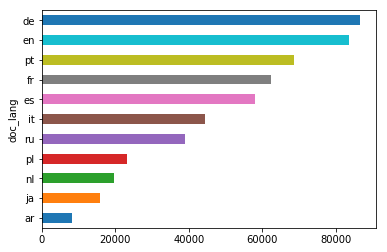

In [179]:
langs.doc_content.str.len().sort_values().plot.barh()

In [215]:
langs['doc_count'] = F1.groupby('doc_label').count().rename(columns={'doc_content':'n'})#.sort_values('n').plot.barh()

In [216]:
langs['doc_sum'] = F1.groupby('doc_label').doc_len.sum().to_frame().rename(columns={'doc_len':'len'})#.sort_values('len').plot.barh()

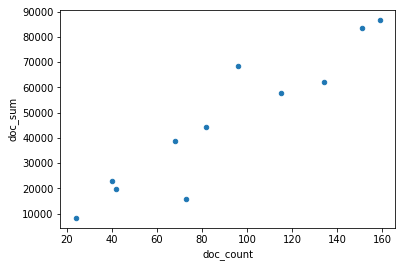

In [218]:
langs.plot.scatter(x='doc_count', y='doc_sum')

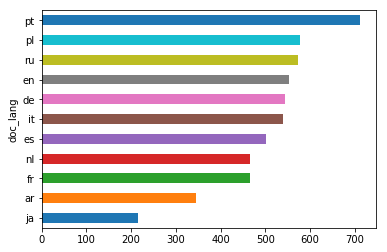

In [221]:
(langs.doc_sum / langs.doc_count).sort_values().plot.barh()